c:\Users\siege\Documents\github\bme3508_spring_2025\.venv\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\siege\Documents\github\bme3508_spring_2025\.venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


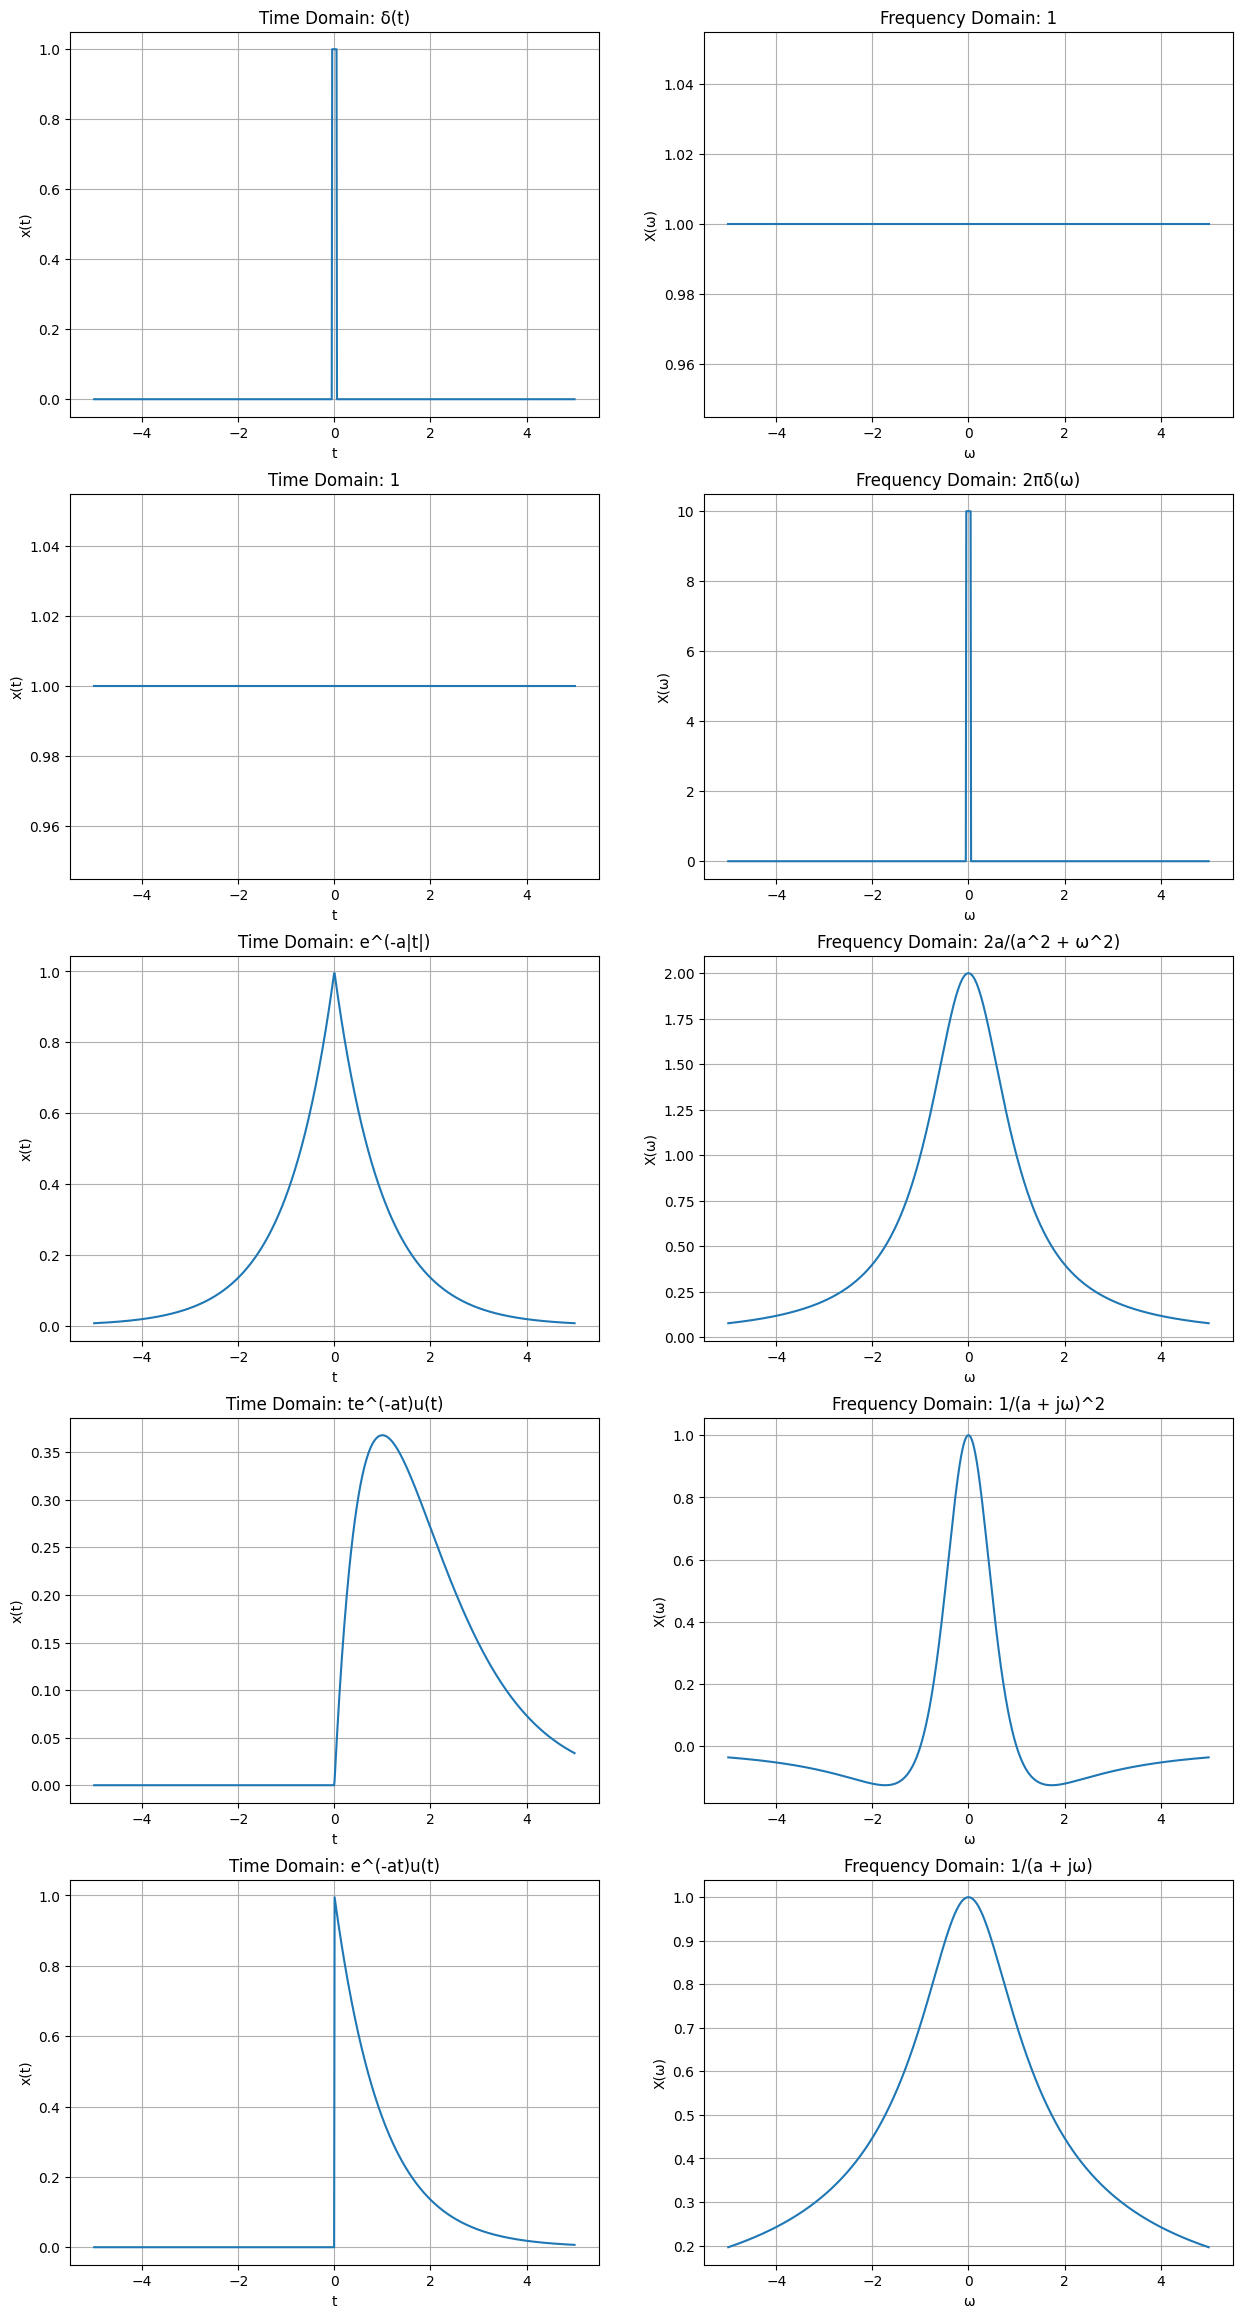

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
from sympy.abc import t, omega
from sympy import fourier_transform, inverse_fourier_transform, exp, sin, cos, pi, DiracDelta, Heaviside, symbols

# Set up the figure for plotting
plt.figure(figsize=(15,65))

# Function to plot time domain and frequency domain
def plot_fourier_pair(time_func, freq_func, time_expr, freq_expr, idx):
    # Time domain plot
    ax1 = plt.subplot(11, 2, 2*idx-1)
    t_vals = np.linspace(-5, 5, 1000)
    
    if callable(time_func):
        f_t = time_func(t_vals)
    else:
        f_t = time_func
        
    plt.plot(t_vals, f_t)
    plt.title(f"Time Domain: {time_expr}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    
    # Frequency domain plot
    ax2 = plt.subplot(11, 2, 2*idx)
    omega_vals = np.linspace(-5, 5, 1000)
    
    if callable(freq_func):
        f_omega = freq_func(omega_vals)
    else:
        f_omega = freq_func
        
    plt.plot(omega_vals, f_omega)
    plt.title(f"Frequency Domain: {freq_expr}")
    plt.xlabel("ω")
    plt.ylabel("X(ω)")
    plt.grid(True)

# 1. δ(t) ↔ 1
plot_fourier_pair(
    lambda t: np.where(np.abs(t) < 0.05, 1, 0),  # Approximation of delta function
    lambda omega: np.ones_like(omega),
    "δ(t)",
    "1",
    1
)

# 2. 1 ↔ 2πδ(ω)
plot_fourier_pair(
    lambda t: np.ones_like(t),
    lambda omega: np.where(np.abs(omega) < 0.05, 10, 0),  # Approximation of 2πδ(ω)
    "1",
    "2πδ(ω)",
    2
)

# 3. e^(-a|t|) ↔ 2a/(a^2 + ω^2)
a = 1
plot_fourier_pair(
    lambda t: np.exp(-a * np.abs(t)),
    lambda omega: 2*a/(a**2 + omega**2),
    "e^(-a|t|)",
    "2a/(a^2 + ω^2)",
    3
)

# 4. te^(-at)u(t) ↔ 1/(a + jω)^2
plot_fourier_pair(
    lambda t: t * np.exp(-a * t) * (t >= 0),
    lambda omega: 1/((a + 1j*omega)**2),  # Using magnitude for plotting
    "te^(-at)u(t)",
    "1/(a + jω)^2",
    4
)

# 5. e^(-at)u(t) ↔ 1/(a + jω)
plot_fourier_pair(
    lambda t: np.exp(-a * t) * (t >= 0),
    lambda omega: 1/np.sqrt((a)**2 + omega**2),  # Magnitude of 1/(a + jω)
    "e^(-at)u(t)",
    "1/(a + jω)",
    5
)



1. Rectangular Pulse


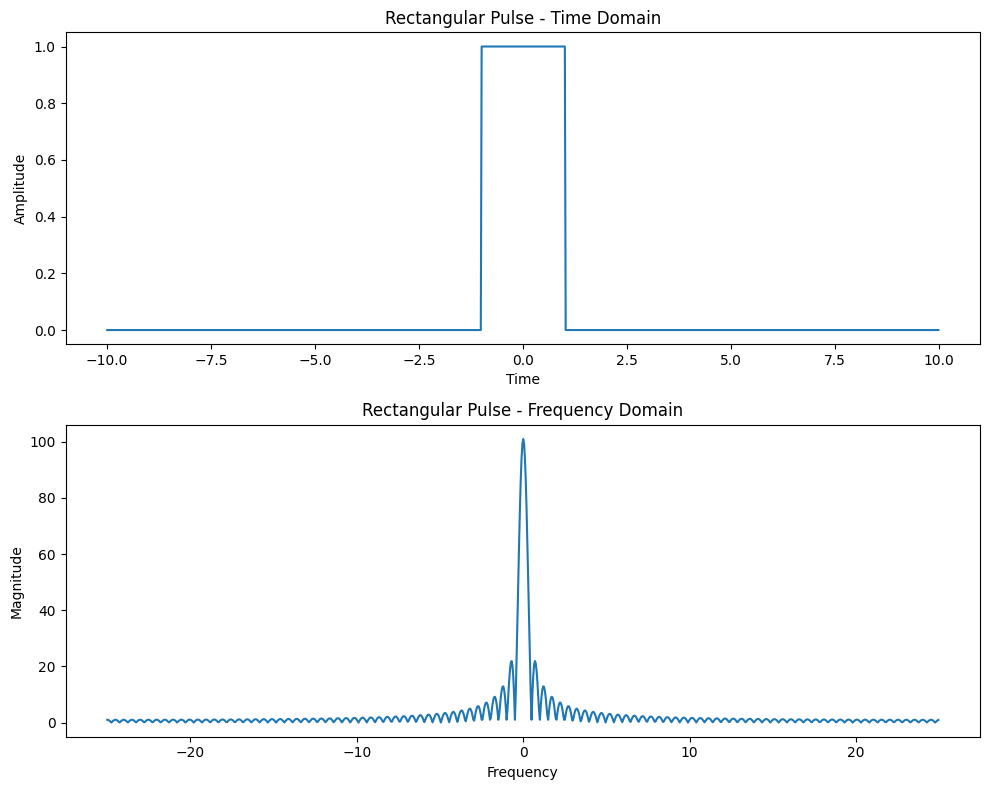


2. Gaussian Function


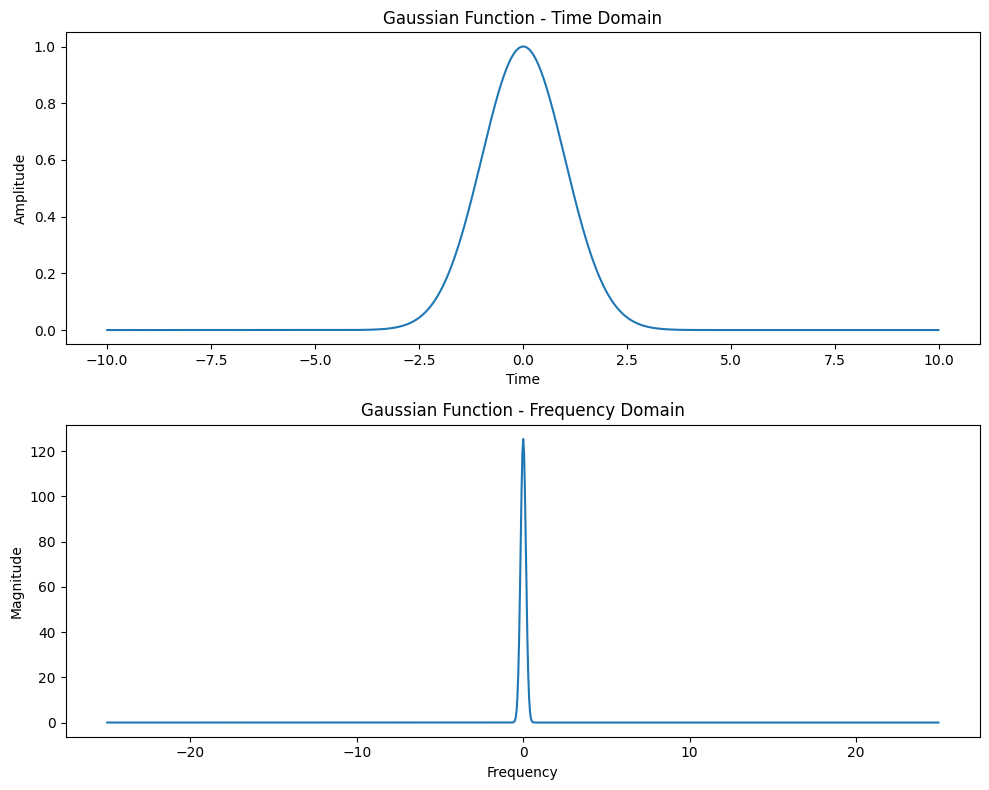


3. Sine Wave


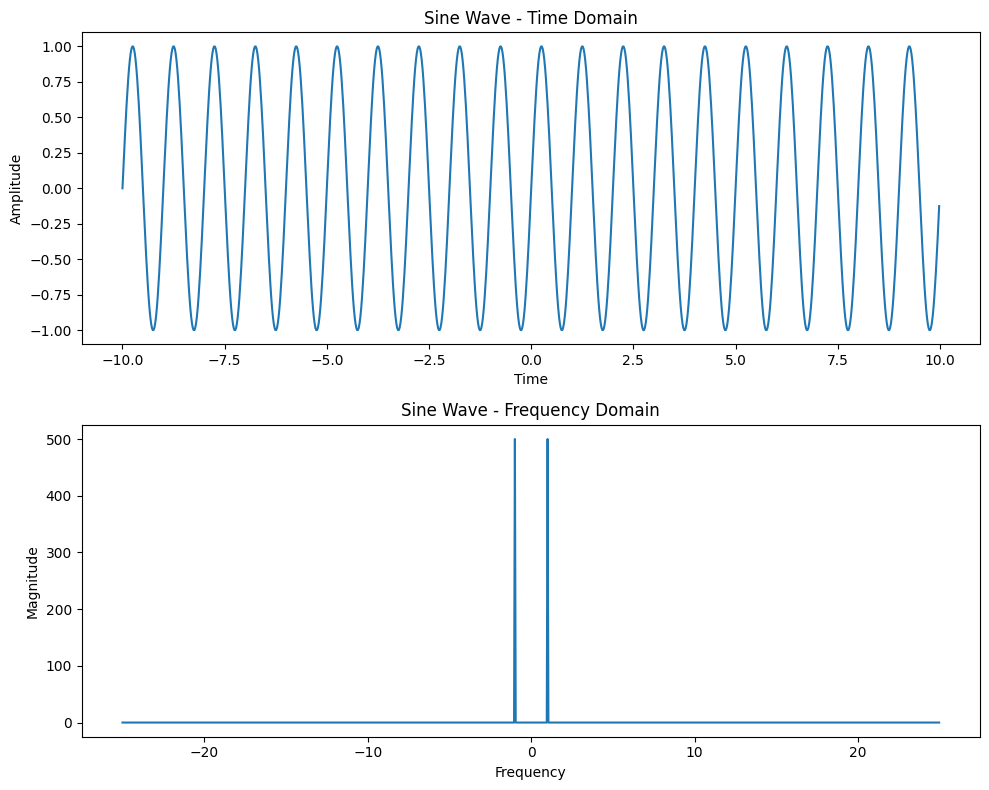


4. Triangular Pulse


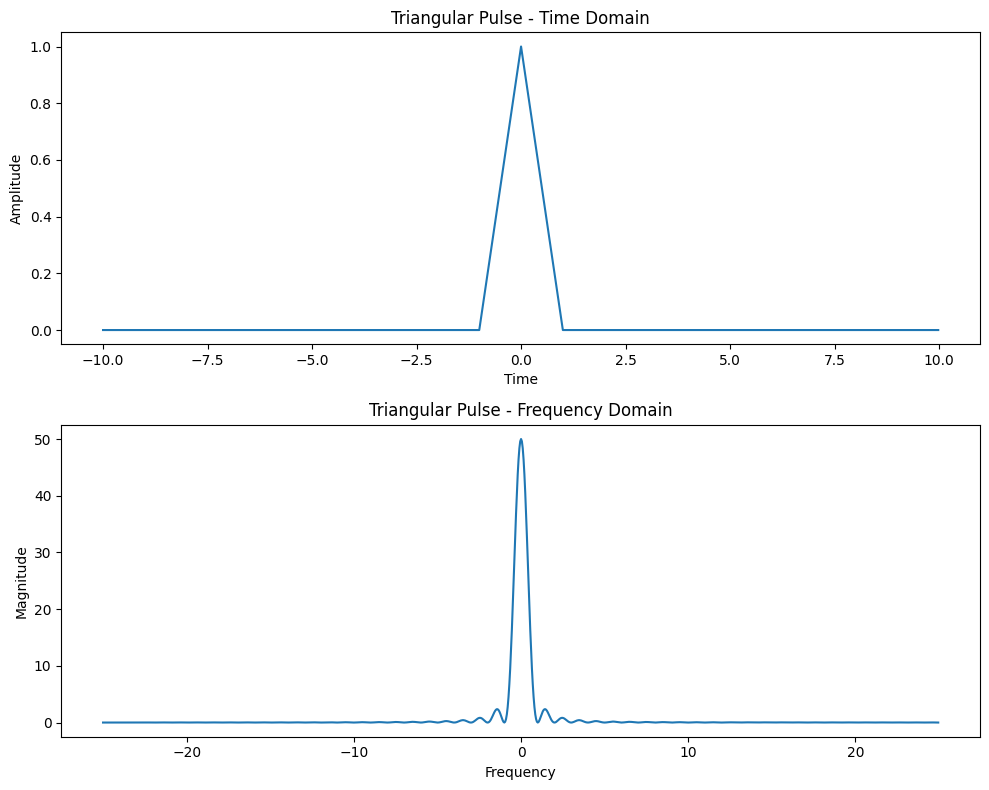


5. Exponential Decay


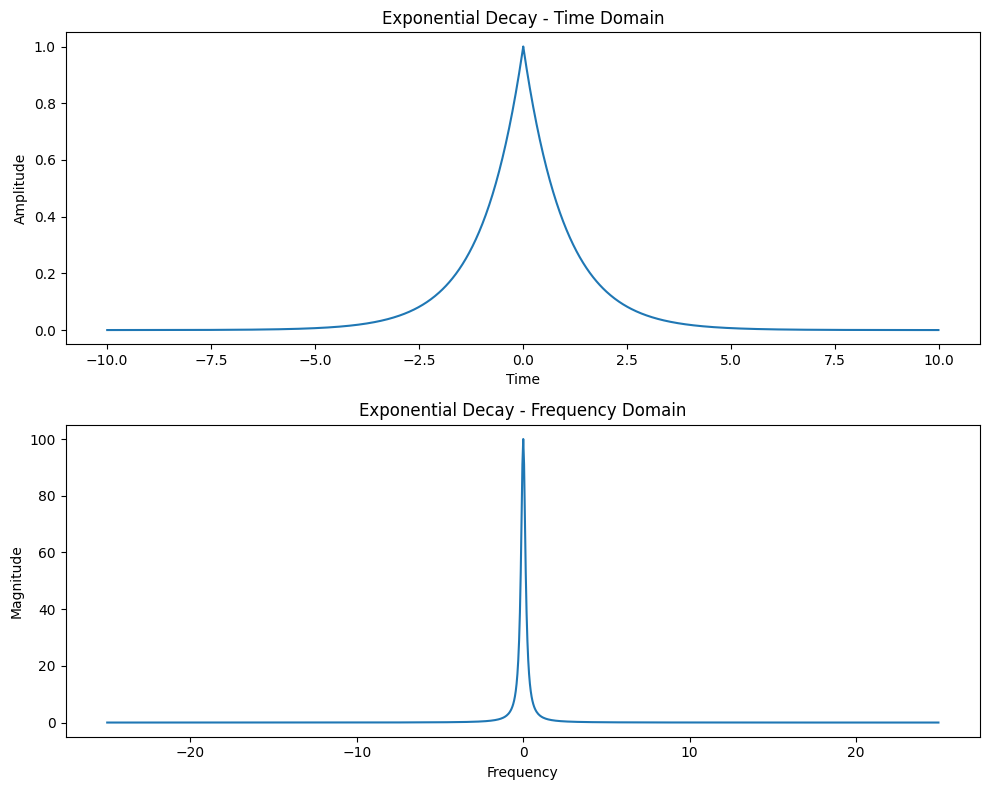

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fourier_pair(t, y, title):
    dt = t[1] - t[0]
    N = len(t)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(N, dt)
    
    # Shift the FFT for better visualization
    fft_shifted = np.fft.fftshift(fft)
    freqs_shifted = np.fft.fftshift(freqs)

    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    ax1.plot(t, y)
    ax1.set_title(f'{title} - Time Domain')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')

    ax2.plot(freqs_shifted, np.abs(fft_shifted))
    ax2.set_title(f'{title} - Frequency Domain')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()

# Time array
t = np.linspace(-10, 10, 1000, endpoint=False)
dt = t[1] - t[0]

# 1. Rectangular Pulse
print("1. Rectangular Pulse")
y1 = np.where(np.abs(t) <= 1, 1, 0)
plot_fourier_pair(t, y1, "Rectangular Pulse")

# 2. Gaussian Function
print("\n2. Gaussian Function")
y2 = np.exp(-t**2 / 2)
plot_fourier_pair(t, y2, "Gaussian Function")

# 3. Sine Wave
print("\n3. Sine Wave")
y3 = np.sin(2 * np.pi * t)
plot_fourier_pair(t, y3, "Sine Wave")

# 4. Triangular Pulse
print("\n4. Triangular Pulse")
y4 = np.where(np.abs(t) <= 1, 1 - np.abs(t), 0)
plot_fourier_pair(t, y4, "Triangular Pulse")

# 5. Exponential Decay
print("\n5. Exponential Decay")
y5 = np.exp(-np.abs(t))
plot_fourier_pair(t, y5, "Exponential Decay")

1. Rectangular Pulse


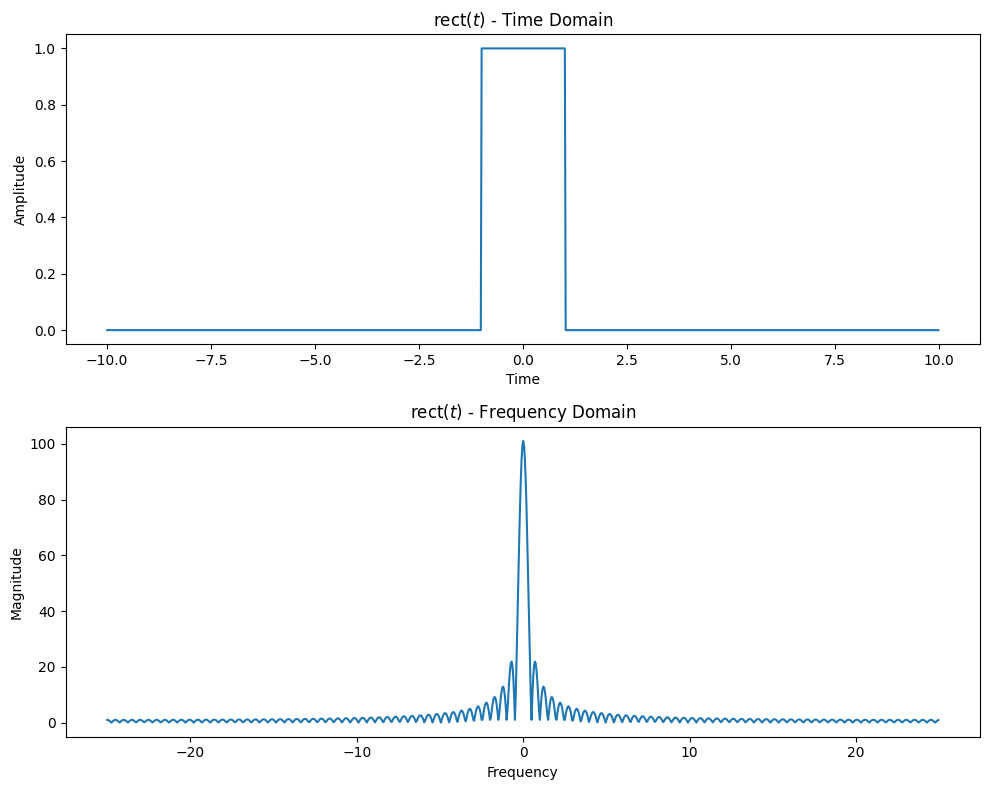


2. Gaussian Function


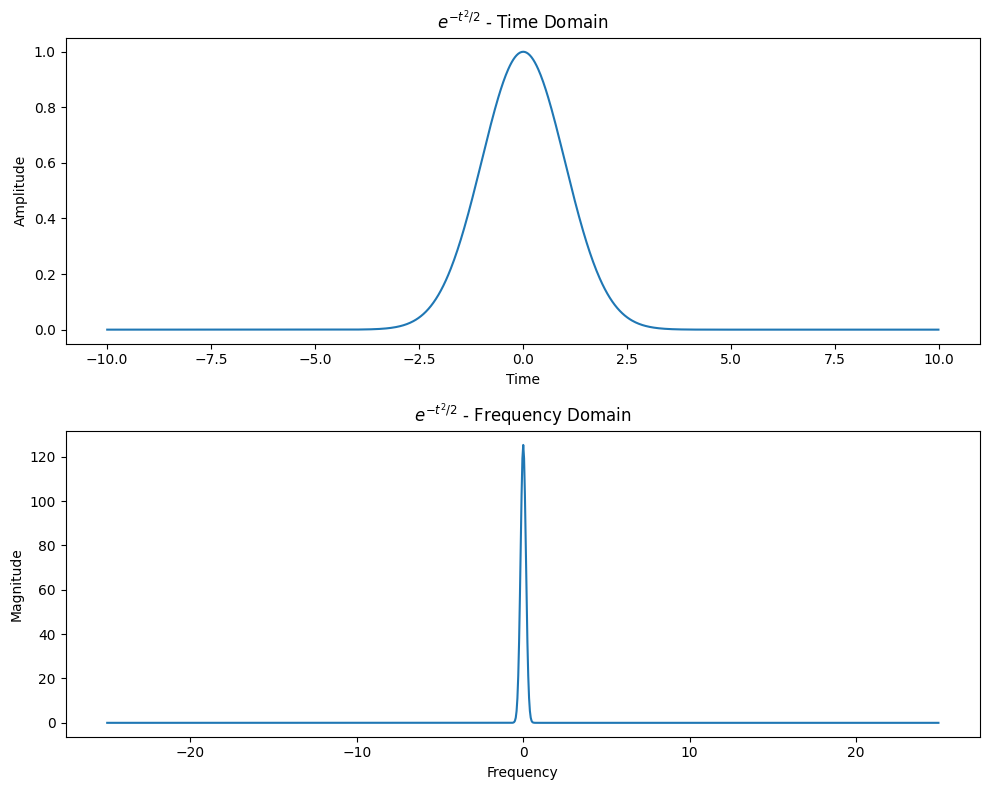


3. Sine Wave


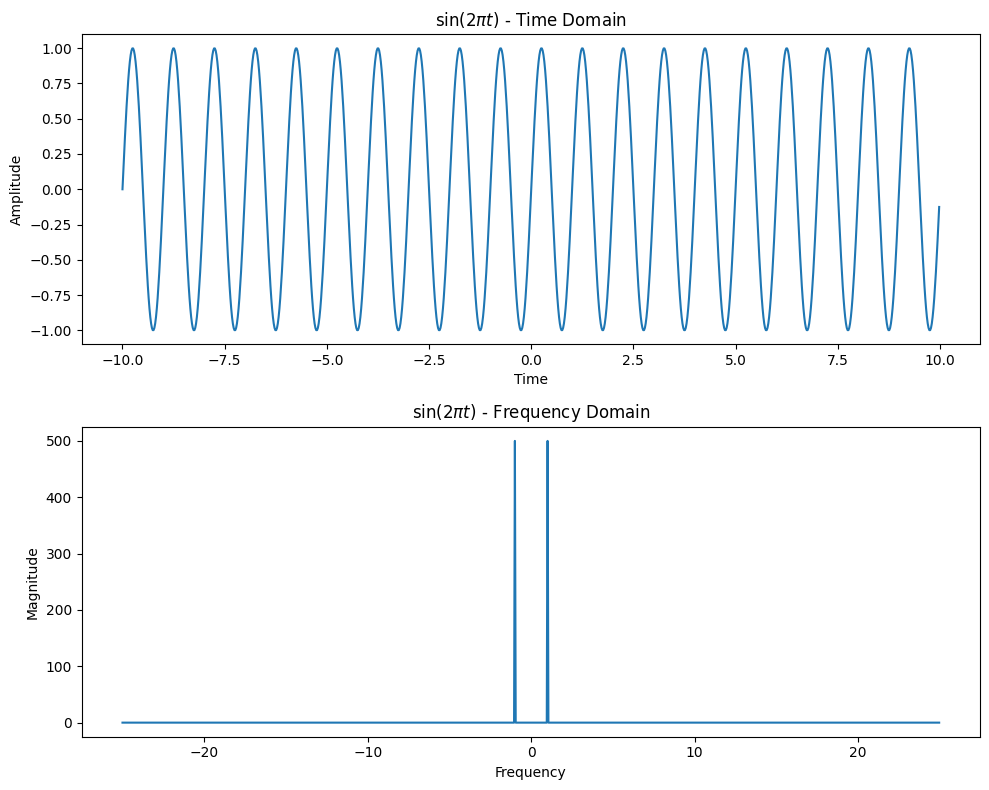


4. Triangular Pulse


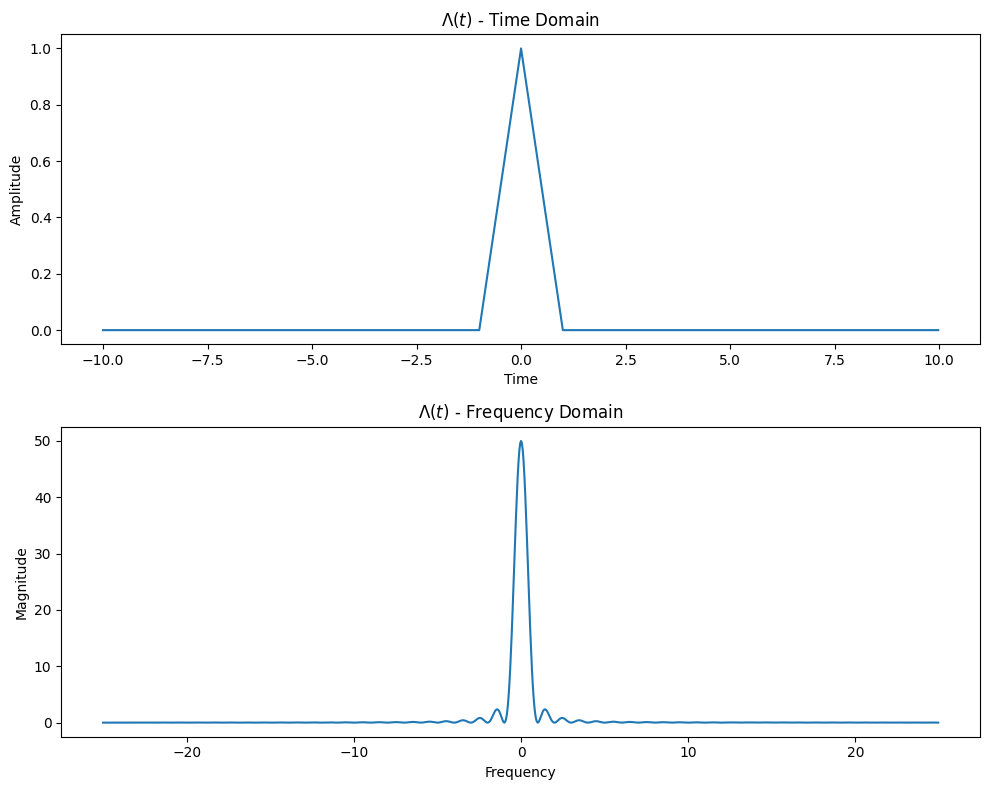


5. Exponential Decay


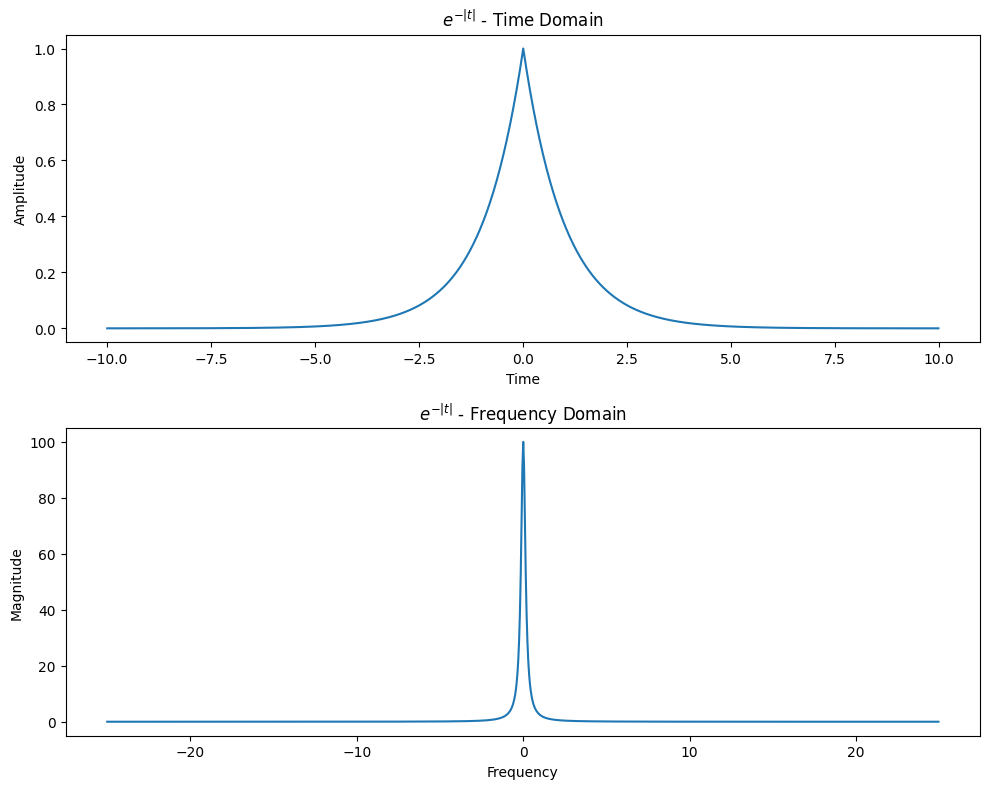

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fourier_pair(t, y, title):
    dt = t[1] - t[0]
    N = len(t)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(N, dt)
    
    # Shift the FFT for better visualization
    fft_shifted = np.fft.fftshift(fft)
    freqs_shifted = np.fft.fftshift(freqs)

    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    ax1.plot(t, y)
    ax1.set_title(f'${title}$ - Time Domain')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')

    ax2.plot(freqs_shifted, np.abs(fft_shifted))
    ax2.set_title(f'${title}$ - Frequency Domain')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()

# Time array
t = np.linspace(-10, 10, 1000, endpoint=False)
dt = t[1] - t[0]

# 1. Rectangular Pulse
print("1. Rectangular Pulse")
y1 = np.where(np.abs(t) <= 1, 1, 0)
plot_fourier_pair(t, y1, r"\text{rect}(t)")

# 2. Gaussian Function
print("\n2. Gaussian Function")
y2 = np.exp(-t**2 / 2)
plot_fourier_pair(t, y2, r"e^{-t^2/2}")

# 3. Sine Wave
print("\n3. Sine Wave")
y3 = np.sin(2 * np.pi * t)
plot_fourier_pair(t, y3, r"\sin(2\pi t)")

# 4. Triangular Pulse
print("\n4. Triangular Pulse")
y4 = np.where(np.abs(t) <= 1, 1 - np.abs(t), 0)
plot_fourier_pair(t, y4, r"\Lambda(t)")

# 5. Exponential Decay
print("\n5. Exponential Decay")
y5 = np.exp(-np.abs(t))
plot_fourier_pair(t, y5, r"e^{-|t|}")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_fourier_pair(t, y, time_domain, freq_domain):
    dt = t[1] - t[0]
    N = len(t)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(N, dt)
    
    # Shift the FFT for better visualization
    fft_shifted = np.fft.fftshift(fft)
    freqs_shifted = np.fft.fftshift(freqs)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.plot(t, y.real)
    ax1.set_title(f'${time_domain}$ - Time Domain')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')

    ax2.plot(freqs_shifted, np.abs(fft_shifted))
    ax2.set_title(f'${freq_domain}$ - Frequency Domain')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()

# Time array
t = np.linspace(-10, 10, 1000, endpoint=False)
dt = t[1] - t[0]

# Create individual interactive functions with sliders for each pair

def plot_exp_decay(a_val=1):
    y = np.exp(-a_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"e^{{-{a_val}t}}u(t)", f"\\frac{{1}}{{{a_val} + j\\omega}}")

interact(plot_exp_decay, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'))

def plot_exp_growth(a_val=1):
    y = np.exp(a_val * t) * (t <= 0)
    plot_fourier_pair(t, y, f"e^{{{a_val}t}}u(-t)", f"\\frac{{1}}{{{a_val} - j\\omega}}")

interact(plot_exp_growth, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'))

def plot_exp_abs(a_val=1):
    y = np.exp(-a_val * np.abs(t))
    plot_fourier_pair(t, y, f"e^{{-{a_val}|t|}}", f"\\frac{{2{a_val}}}{{{a_val}^2 + \\omega^2}}")

interact(plot_exp_abs, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'))

def plot_t_exp_decay(a_val=1):
    y = t * np.exp(-a_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"te^{{-{a_val}t}}u(t)", f"\\frac{{1}}{{({a_val} + j\\omega)^2}}")

interact(plot_t_exp_decay, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'))

def plot_tn_exp_decay(a_val=1, n=2):
    y = (t**n) * np.exp(-a_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"t^{n}e^{{-{a_val}t}}u(t)", f"\\frac{{{n}!}}{{({a_val} + j\\omega)^{{{n}+1}}}}")

interact(plot_tn_exp_decay, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'))

def plot_delta():
    y = np.zeros_like(t)
    y[len(t)//2] = 1/dt  # Approximation of delta function
    plot_fourier_pair(t, y, r"\delta(t)", r"1")

plot_delta()

def plot_constant():
    y = np.ones_like(t)
    plot_fourier_pair(t, y, r"1", r"2\pi\delta(\omega)")

plot_constant()

def plot_complex_exp(w0_val=2*np.pi):
    y = np.exp(1j * w0_val * t)
    plot_fourier_pair(t, y, f"e^{{j{w0_val}t}}", f"2\\pi\\delta(\\omega - {w0_val})")

interact(plot_complex_exp, 
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_cosine(w0_val=2*np.pi):
    y = np.cos(w0_val * t)
    plot_fourier_pair(t, y, f"\\cos({w0_val}t)", f"\\pi[\\delta(\\omega - {w0_val}) + \\delta(\\omega + {w0_val})]")

interact(plot_cosine, 
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_sine(w0_val=2*np.pi):
    y = np.sin(w0_val * t)
    plot_fourier_pair(t, y, f"\\sin({w0_val}t)", f"j\\pi[\\delta(\\omega + {w0_val}) - \\delta(\\omega - {w0_val})]")

interact(plot_sine, 
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_unit_step():
    y = np.heaviside(t, 1)
    plot_fourier_pair(t, y, r"u(t)", r"\pi\delta(\omega) + \frac{1}{j\omega}")

plot_unit_step()

def plot_signum():
    y = np.sign(t)
    plot_fourier_pair(t, y, r"\text{sgn}(t)", r"\frac{2}{j\omega}")

plot_signum()

def plot_cos_step(w0_val=2*np.pi):
    y = np.cos(w0_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"\\cos({w0_val}t)u(t)", f"\\frac{{\\pi}}{{2}}[\\delta(\\omega - {w0_val}) + \\delta(\\omega + {w0_val})] + \\frac{{j\\omega}}{{{w0_val}^2 - \\omega^2}}")

interact(plot_cos_step, 
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_sin_step(w0_val=2*np.pi):
    y = np.sin(w0_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"\\sin({w0_val}t)u(t)", f"\\frac{{\\pi}}{{2j}}[\\delta(\\omega - {w0_val}) - \\delta(\\omega + {w0_val})] + \\frac{{{w0_val}}}{{{w0_val}^2 - \\omega^2}}")

interact(plot_sin_step, 
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_exp_sin(a_val=1, w0_val=2*np.pi):
    y = np.exp(-a_val * t) * np.sin(w0_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"e^{{-{a_val}t}}\\sin({w0_val}t)u(t)", f"\\frac{{{w0_val}}}{{({a_val}+j\\omega)^2 + {w0_val}^2}}")

interact(plot_exp_sin, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'),
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_exp_cos(a_val=1, w0_val=2*np.pi):
    y = np.exp(-a_val * t) * np.cos(w0_val * t) * (t >= 0)
    plot_fourier_pair(t, y, f"e^{{-{a_val}t}}\\cos({w0_val}t)u(t)", f"\\frac{{{a_val}+j\\omega}}{{({a_val}+j\\omega)^2 + {w0_val}^2}}")

interact(plot_exp_cos, 
         a_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='a:'),
         w0_val=FloatSlider(min=0.1, max=10.0, step=0.1, value=2*np.pi, description='ω₀:'))

def plot_rect(tau_val=1):
    y = np.where(np.abs(t) <= tau_val/2, 1, 0)
    plot_fourier_pair(t, y, f"\\text{{rect}}(t/{tau_val})", f"{tau_val}\\text{{sinc}}(\\omega{tau_val}/2)")

interact(plot_rect, 
         tau_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='τ:'))

def plot_sinc(W_val=1):
    y = (W_val/np.pi) * np.sinc(W_val * t)
    plot_fourier_pair(t, y, f"\\frac{{{W_val}}}{{\\pi}}\\text{{sinc}}({W_val}t)", f"\\text{{rect}}(\\omega/2{W_val})")

interact(plot_sinc, 
         W_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='W:'))

def plot_triangle(tau_val=1):
    y = np.where(np.abs(t) <= tau_val, 1 - np.abs(t)/tau_val, 0)
    plot_fourier_pair(t, y, f"\\Delta(t/{tau_val})", f"\\frac{{{tau_val}}}{{2}}\\text{{sinc}}^2(\\omega{tau_val}/4)")

interact(plot_triangle, 
         tau_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='τ:'))

def plot_sinc_squared(W_val=1):
    y = (W_val/(2*np.pi)) * (np.sinc(W_val * t / 2))**2
    plot_fourier_pair(t, y, f"\\frac{{{W_val}}}{{2\\pi}}\\text{{sinc}}^2({W_val}t/2)", f"\\Delta(\\omega/2{W_val})")

interact(plot_sinc_squared, 
         W_val=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='W:'))

interactive(children=(FloatSlider(value=1.0, description='a:', max=5.0, min=0.1), FloatSlider(value=6.28318530…

<function __main__.plot_with_sliders(a_val=1, w0_val=6.283185307179586, W_val=1, tau_val=1)>